In [1]:
#preprocess.....

import pandas as pd

# DATA
data = pd.read_csv(r"C:\Users\nh013\Desktop\Explore Medical Narratives on Older Adult Falls\primary_data.csv")

# DEFINE COL........
selected_columns = [
    'cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race', 'other_race', 'hispanic',
    'diagnosis', 'other_diagnosis', 'diagnosis_2', 'other_diagnosis_2', 'body_part', 'body_part_2', 
    'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3'
]

df_data = data[selected_columns]

# FIND MISSING VALUE
missing_values = df_data.isnull().sum()


print("Missing values in df_data:")
print(missing_values)

df_data.dropna(inplace=True)

print("DataFrame after dropping rows with missing values:")
print(df_data)


Missing values in df_data:
cpsc_case_number          0
narrative                 0
treatment_date            0
age                       0
sex                       0
race                      0
other_race           114106
hispanic                  0
diagnosis                 0
other_diagnosis      112606
diagnosis_2           71983
other_diagnosis_2    110150
body_part                 0
body_part_2           71983
disposition               0
location                  0
fire_involvement          0
alcohol                   0
drug                      0
product_1                 0
product_2                 0
product_3                 0
dtype: int64
DataFrame after dropping rows with missing values:
       cpsc_case_number                                          narrative  \
29611         200320024  75YOM P/W SWELLING TO RT FACE AFTER FALLING OF...   
90479         220605001  65YOF COMPLAINING OF LEG PAIN AFTER POSSIBLE F...   

      treatment_date  age  sex  race    other_race  hispan

In [13]:
#PREPROCESS WITH FEATURE ENG...

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer


# DATA
data = pd.read_csv(r"C:\Users\nh013\Desktop\Explore Medical Narratives on Older Adult Falls\primary_data.csv")

# DEFINE COL....
selected_columns = [
    'cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race', 'other_race', 'hispanic',
    'diagnosis', 'other_diagnosis', 'diagnosis_2', 'other_diagnosis_2', 'body_part', 'body_part_2', 
    'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3'
]

df_data = data[selected_columns]


# FILL MISSING VALUES WITH MEAN.....

imputer = SimpleImputer(strategy='mean')
df_data[numeric_columns] = imputer.fit_transform(df_data[numeric_columns])

# CALCULATE THE MEAN OF 'diagnosis_2' COLUMN....
mean_diagnosis_2 = df_data['diagnosis_2'].mean()

# FILL MISSING VALUES IN 'diagnosis_2' WITH THE MEAN.....
df_data['diagnosis_2'].fillna(mean_diagnosis_2, inplace=True)


# FILL NAN VALUES WITH 0
columns_to_fill_with_zeros = ['body_part_2']
df_data[columns_to_fill_with_zeros] = df_data[columns_to_fill_with_zeros].fillna(0)


# PERFORM ISOLATION FOREST FOR HANDLE OUTLIERS
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
for column in numeric_columns:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_data[column] = iso_forest.fit_predict(df_data[[column]])

    
# LABEL ENCODING FOR CATEGORICAL COL WITH HIGH CARDINALITY....
label_encoder = LabelEncoder()
high_cardinality_categorical_columns = ['narrative', 'treatment_date', 'other_race', 'other_diagnosis', 'other_diagnosis_2']
for column in high_cardinality_categorical_columns:
    df_data[column] = label_encoder.fit_transform(df_data[column])

# DROP ROWS WITH MISSING VALUES IN CATEGORICAL COL......
df_data.dropna(subset=high_cardinality_categorical_columns, inplace=True)
    
    
    
# NORMALIZE NUMERIC COL.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
scaler = StandardScaler()
df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])



print("DataFrame after handling outliers, label encoding, normalizing, and filling missing values:")
print(df_data)



missing_values = df_data.isnull().sum()
print("Missing values in df_data after handling 'diagnosis_2':")
print(missing_values)


C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


DataFrame after handling outliers, label encoding, normalizing, and filling missing values:
        cpsc_case_number  narrative  treatment_date       age  sex  race  \
0              190103269     109725               0  0.155965    1     0   
1              190103270      87119               0  0.155965    1     0   
2              190103273      90103               0  0.155965    2     0   
3              190103291      11064               0  0.155965    2     0   
4              190103294      22603               0  0.155965    2     0   
...                  ...        ...             ...       ...  ...   ...   
115123         230217170      65838            1390  0.155965    1     1   
115124         230217171      28733            1390  0.155965    2     1   
115125         230217174      98301            1390  0.155965    2     1   
115126         230218390      49697            1392  0.155965    1     1   
115127         230222638      24609            1392  0.155965    2     1

C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


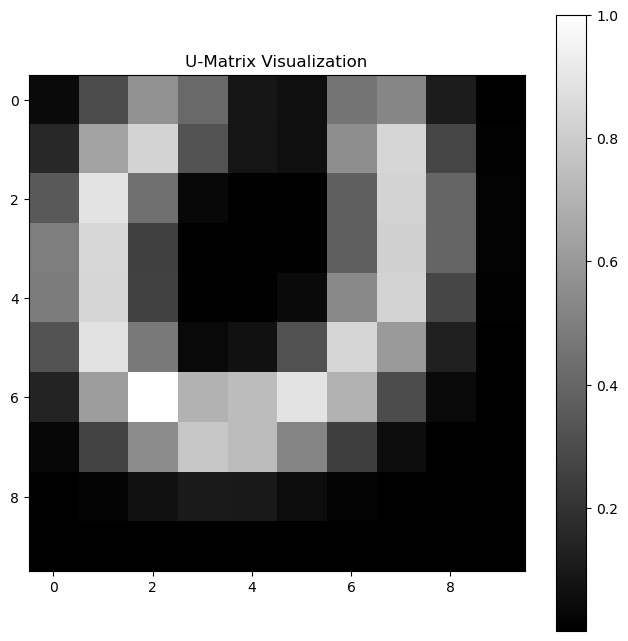

In [17]:
#SOMs are neural networks used for clustering and visualization.......

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# DATA
data = pd.read_csv(r"C:\Users\nh013\Desktop\Explore Medical Narratives on Older Adult Falls\primary_data.csv")

# DEFINE COL....
selected_columns = [
    'cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race', 'other_race', 'hispanic',
    'diagnosis', 'other_diagnosis', 'diagnosis_2', 'other_diagnosis_2', 'body_part', 'body_part_2', 
    'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3'
]

df_data = data[selected_columns]

# FILL MISSING VALUES WITH MEAN.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
imputer = SimpleImputer(strategy='mean')
df_data[numeric_columns] = imputer.fit_transform(df_data[numeric_columns])

# CALCULATE THE MEAN OF 'diagnosis_2' COLUMN....
mean_diagnosis_2 = df_data['diagnosis_2'].mean()

# FILL MISSING VALUES IN 'diagnosis_2' WITH THE MEAN.....
df_data['diagnosis_2'].fillna(mean_diagnosis_2, inplace=True)

# FILL NAN VALUES WITH 0
columns_to_fill_with_zeros = ['body_part_2']
df_data[columns_to_fill_with_zeros] = df_data[columns_to_fill_with_zeros].fillna(0)

# PERFORM ISOLATION FOREST FOR HANDLE OUTLIERS
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
for column in numeric_columns:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_data[column] = iso_forest.fit_predict(df_data[[column]])

# LABEL ENCODING FOR CATEGORICAL COL WITH HIGH CARDINALITY....
label_encoder = LabelEncoder()
high_cardinality_categorical_columns = ['narrative', 'treatment_date', 'other_race', 'other_diagnosis', 'other_diagnosis_2']
for column in high_cardinality_categorical_columns:
    df_data[column] = label_encoder.fit_transform(df_data[column])

# DROP ROWS WITH MISSING VALUES IN CATEGORICAL COL......
df_data.dropna(subset=high_cardinality_categorical_columns, inplace=True)

# NORMALIZE NUMERIC COL.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
scaler = StandardScaler()
df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])

# BUILD A SOM MODEL 
input_len = df_data.shape[1]  
som = MiniSom(10, 10, input_len, sigma=1.0, learning_rate=0.5)
data_array = df_data.values  # INCLUDE ALL COL.....

# TRAIN THE MODEL
som.train_batch(data_array, num_iteration=1000)

# GET THE WINNING NEURONS FOR EACH DATA POINT
winning_neurons = np.array([som.winner(data) for data in data_array])


u_matrix = som.distance_map()  # U MATRIX REPRESENT  THE DISTANCE BETWEEN NEURONS
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix, cmap='gray')
plt.title('U-Matrix Visualization')
plt.colorbar()
plt.show()


In [23]:
#perform auto encoder model.....

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import Input, Dense
from keras.models import Model

# DATA
data = pd.read_csv(r"C:\Users\nh013\Desktop\Explore Medical Narratives on Older Adult Falls\primary_data.csv")

# DEFINE COL....
selected_columns = [
    'cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race', 'other_race', 'hispanic',
    'diagnosis', 'other_diagnosis', 'diagnosis_2', 'other_diagnosis_2', 'body_part', 'body_part_2', 
    'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3'
]

df_data = data[selected_columns]

# FILL MISSING VALUES WITH MEAN.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
imputer = SimpleImputer(strategy='mean')
df_data[numeric_columns] = imputer.fit_transform(df_data[numeric_columns])

# CALCULATE THE MEAN OF 'diagnosis_2' COLUMN....
mean_diagnosis_2 = df_data['diagnosis_2'].mean()

# FILL MISSING VALUES IN 'diagnosis_2' WITH THE MEAN.....
df_data['diagnosis_2'].fillna(mean_diagnosis_2, inplace=True)

# FILL NAN VALUES WITH 0
columns_to_fill_with_zeros = ['body_part_2']
df_data[columns_to_fill_with_zeros] = df_data[columns_to_fill_with_zeros].fillna(0)

# PERFORM ISOLATION FOREST FOR HANDLE OUTLIERS
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
for column in numeric_columns:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_data[column] = iso_forest.fit_predict(df_data[[column]])

# LABEL ENCODING FOR CATEGORICAL COL WITH HIGH CARDINALITY....
label_encoder = LabelEncoder()
high_cardinality_categorical_columns = ['narrative', 'treatment_date', 'other_race', 'other_diagnosis', 'other_diagnosis_2']
for column in high_cardinality_categorical_columns:
    df_data[column] = label_encoder.fit_transform(df_data[column])

# DROP ROWS WITH MISSING VALUES IN CATEGORICAL COL......
df_data.dropna(subset=high_cardinality_categorical_columns, inplace=True)

# NORMALIZE NUMERIC COL.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
scaler = StandardScaler()
df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test = train_test_split(df_data, test_size=0.2, random_state=42)

# BUILD AOTUENCODER MODEL....
input_dim = len(selected_columns)
encoding_dim = 32  # Adjust this as needed
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

# COMPILE THE AUTOENCODER MODEL...
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# TRAIN MODEL
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_data=(X_test, X_test))

# EVALUATE THE MODEL
decoded_data = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, decoded_data)
print(f"Mean Squared Error (MSE): {mse}")


C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Epoch 1/50
1440/1440 [==============================] - 4s 2ms/step - loss: 1976753731928064.0000 - val_loss: 1975213583499264.0000
Epoch 2/50
1440/1440 [==============================] - 3s 2ms/step - loss: 1976754671452160.0000 - val_loss: 1975213583499264.0000
Epoch 3/50
1440/1440 [==============================] - 3s 2ms/step - loss: 1976752255533056.0000 - val_loss: 1975213583499264.0000
Epoch 4/50
1440/1440 [==============================] - 3s 2ms/step - loss: 1976753731928064.0000 - val_loss: 1975213583499264.0000
Epoch 5/50
1440/1440 [==============================] - 3s 2ms/step - loss: 1976751047573504.0000 - val_loss: 1975213583499264.0000
Epoch 6/50
1440/1440 [==============================] - 3s 2ms/step - loss: 1976751316008960.0000 - val_loss: 1975213583499264.0000
Epoch 7/50
1440/1440 [==============================] - 3s 2ms/step - loss: 1976753195057152.0000 - val_loss: 1975213583499264.0000
Epoch 8/50
1440/1440 [==============================] - 3s 2ms/step - loss: 

C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


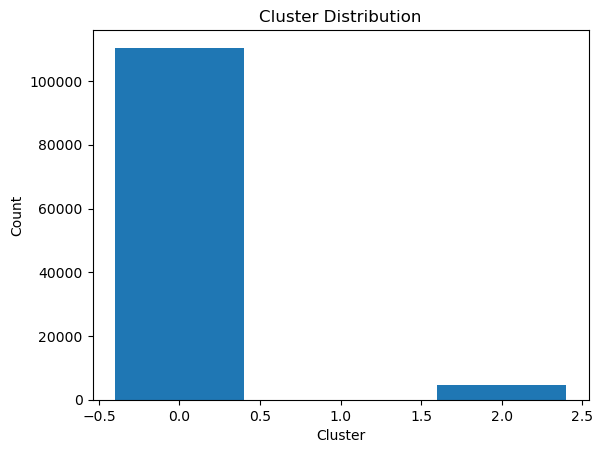

In [20]:
#PERFORM K-MEANS CLUSTERING WITH VISUALIZE

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# DATA
data = pd.read_csv(r"C:\Users\nh013\Desktop\Explore Medical Narratives on Older Adult Falls\primary_data.csv")

# DEFINE COL....
selected_columns = [
    'cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race', 'other_race', 'hispanic',
    'diagnosis', 'other_diagnosis', 'diagnosis_2', 'other_diagnosis_2', 'body_part', 'body_part_2', 
    'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3'
]

df_data = data[selected_columns]

# FILL MISSING VALUES WITH MEAN.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
imputer = SimpleImputer(strategy='mean')
df_data[numeric_columns] = imputer.fit_transform(df_data[numeric_columns])

# CALCULATE THE MEAN OF 'diagnosis_2' COLUMN....
mean_diagnosis_2 = df_data['diagnosis_2'].mean()

# FILL MISSING VALUES IN 'diagnosis_2' WITH THE MEAN.....
df_data['diagnosis_2'].fillna(mean_diagnosis_2, inplace=True)

# FILL NAN VALUES WITH 0
columns_to_fill_with_zeros = ['body_part_2']
df_data[columns_to_fill_with_zeros] = df_data[columns_to_fill_with_zeros].fillna(0)

# PERFORM ISOLATION FOREST FOR HANDLE OUTLIERS
for column in numeric_columns:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_data[column] = iso_forest.fit_predict(df_data[[column]])

# LABEL ENCODING FOR CATEGORICAL COL WITH HIGH CARDINALITY....
label_encoder = LabelEncoder()
high_cardinality_categorical_columns = ['narrative', 'treatment_date', 'other_race', 'other_diagnosis', 'other_diagnosis_2']
for column in high_cardinality_categorical_columns:
    df_data[column] = label_encoder.fit_transform(df_data[column])

# DROP ROWS WITH MISSING VALUES IN CATEGORICAL COL......
df_data.dropna(subset=high_cardinality_categorical_columns, inplace=True)

# NORMALIZE NUMERIC COL.....
scaler = StandardScaler()
df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])

# PERFORM K-MEANS CLUSTERING...
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_data['cluster'] = kmeans.fit_predict(df_data[numeric_columns])

# VISUALIZE AND CLUSTER DISTRIBUTION
cluster_counts = df_data['cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()




In [22]:
#perform deep clustering algorithms 
#and pefrom Autoencoders for unsupervised feature learning followed by clustering.


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import silhouette_score

# DATA
data = pd.read_csv(r"C:\Users\nh013\Desktop\Explore Medical Narratives on Older Adult Falls\primary_data.csv")

# DEFINE COL....
selected_columns = [
    'cpsc_case_number', 'narrative', 'treatment_date', 'age', 'sex', 'race', 'other_race', 'hispanic',
    'diagnosis', 'other_diagnosis', 'diagnosis_2', 'other_diagnosis_2', 'body_part', 'body_part_2', 
    'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3'
]

df_data = data[selected_columns]

# FILL MISSING VALUES WITH MEAN.....
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
imputer = SimpleImputer(strategy='mean')
df_data[numeric_columns] = imputer.fit_transform(df_data[numeric_columns])

# CALCULATE THE MEAN OF 'diagnosis_2' COLUMN....
mean_diagnosis_2 = df_data['diagnosis_2'].mean()

# FILL MISSING VALUES IN 'diagnosis_2' WITH THE MEAN.....
df_data['diagnosis_2'].fillna(mean_diagnosis_2, inplace=True)

# FILL NAN VALUES WITH 0
columns_to_fill_with_zeros = ['body_part_2']
df_data[columns_to_fill_with_zeros] = df_data[columns_to_fill_with_zeros].fillna(0)

# PERFORM ISOLATION FOREST FOR HANDLE OUTLIERS
numeric_columns = ['age', 'fire_involvement', 'alcohol', 'drug']
for column in numeric_columns:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_data[column] = iso_forest.fit_predict(df_data[[column]])

# LABEL ENCODING FOR CATEGORICAL COL WITH HIGH CARDINALITY....
label_encoder = LabelEncoder()
high_cardinality_categorical_columns = ['narrative', 'treatment_date', 'other_race', 'other_diagnosis', 'other_diagnosis_2']
for column in high_cardinality_categorical_columns:
    df_data[column] = label_encoder.fit_transform(df_data[column])

# DROP ROWS WITH MISSING VALUES IN CATEGORICAL COL......
df_data.dropna(subset=high_cardinality_categorical_columns, inplace=True)

# NORMALIZE NUMERIC COL.....
scaler = StandardScaler()
df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])

# BUILD AUTOENCODER MODEL FOR UNSUPERVISED FEATURE LEARNING 
input_dim = len(df_data.columns) - 2  
encoding_dim = 32  # NUMBER OF NEURON IN THE ENCODING LAYER

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation="relu")(input_layer)
encoder = layers.Dense(encoding_dim // 2, activation="relu")(encoder)
encoder = layers.Dense(encoding_dim // 4, activation="relu")(encoder)
decoder = layers.Dense(encoding_dim // 2, activation="relu")(encoder)
decoder = layers.Dense(encoding_dim, activation="relu")(decoder)
decoder = layers.Dense(input_dim, activation="linear")(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

# COMPILE THE AUTOENCODER MODEL
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# TRAIN THE MODEL
X = df_data.drop(columns=['cpsc_case_number', 'narrative'])
autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)

# PERFROM THE TRAIN ENCODER TO GET THE ENCODED FEATURE
encoded_features = autoencoder.predict(X)

# PERFROM K-MEANS CLUSTERING ON THE ENCODED FEATURE
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_data['cluster'] = kmeans.fit_predict(encoded_features)

# EVALUATE THE CLUSTERING RESULT  WITH SILHOUETTE SCORE 
silhouette_avg = silhouette_score(encoded_features, df_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")



C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Epoch 1/100
2879/2879 [==============================] - 13s 4ms/step - loss: 10846.2051 - val_loss: 238.9440
Epoch 2/100
2879/2879 [==============================] - 11s 4ms/step - loss: 192.3944 - val_loss: 184.6257
Epoch 3/100
2879/2879 [==============================] - 11s 4ms/step - loss: 188.7525 - val_loss: 190.7704
Epoch 4/100
2879/2879 [==============================] - 10s 3ms/step - loss: 186.6254 - val_loss: 280.0788
Epoch 5/100
2879/2879 [==============================] - 9s 3ms/step - loss: 187.0621 - val_loss: 211.5503
Epoch 6/100
2879/2879 [==============================] - 11s 4ms/step - loss: 180.6045 - val_loss: 235.9564
Epoch 7/100
2879/2879 [==============================] - 9s 3ms/step - loss: 178.5326 - val_loss: 338.2316
Epoch 8/100
2879/2879 [==============================] - 10s 4ms/step - loss: 179.1076 - val_loss: 150.4674
Epoch 9/100
2879/2879 [==============================] - 10s 3ms/step - loss: 175.2554 - val_loss: 470.8514
Epoch 10/100
2879/2879 [====

C:\Users\nh013\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5776128768920898
